In [1]:
%matplotlib notebook
#%load_ext Cython

# -*- coding: utf-8 -*-
"""
Created on 2018-01-15

@author: talbot
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

DTYPE = np.double

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

# <center>The perceptron</center>
## <center>Hugues Talbot</center>

In this notebook/presentation, we study the simplest neural network from the ground up. In spite of its extreme simplicity, we show that it has promising capabilities. Most importantly, this study allows us to demonstrate the basic elements of neural network analysis and optimisation.

$\newcommand{\V}[1]{\mathbf{\sf #1}}$
$\newcommand{\M}[1]{\mathbf{#1}}$

## A single artificial neuron
The _perceptron_ is a single artificial "neuron", an element of an artificial neural network. 
<img src="perceptron.png">$\label{perceptron}$

<!--- 
\begin{figure}
\centering
\includegraphics[width=10cm]{perceptron.png}
\caption{\label{fig:perceptron}
The classical perceptron}
\end{figure}) 
--->


As shown on the previous figure, the artificial neuron take as input a vector of real numbers $\V{x}=\{x_1, x_2, \ldots, x_n\}$. It performs a weighted sum and composes the result with an activation function $\sigma$, that acts like a threshold. The output is called $y$, a real number.

A typical activation function is a _sigmoid_. This is a smooth function that takes any real number as input and outputs a value between 0 and 1. 

## The activation function
Here we show the plot of a <a href=https://en.wikipedia.org/wiki/Sigmoid_function>sigmoid</a>, for which one possible formula is

\begin{equation}
f(x) = \frac{1}{1+\exp(-x)}
\end{equation}

This particular sigmoid is called the _logistic_ function. It tends to 0 as x tends to $-\infty$ and to 1 as x tends to $+\infty$.

<IPython.core.display.Javascript object>


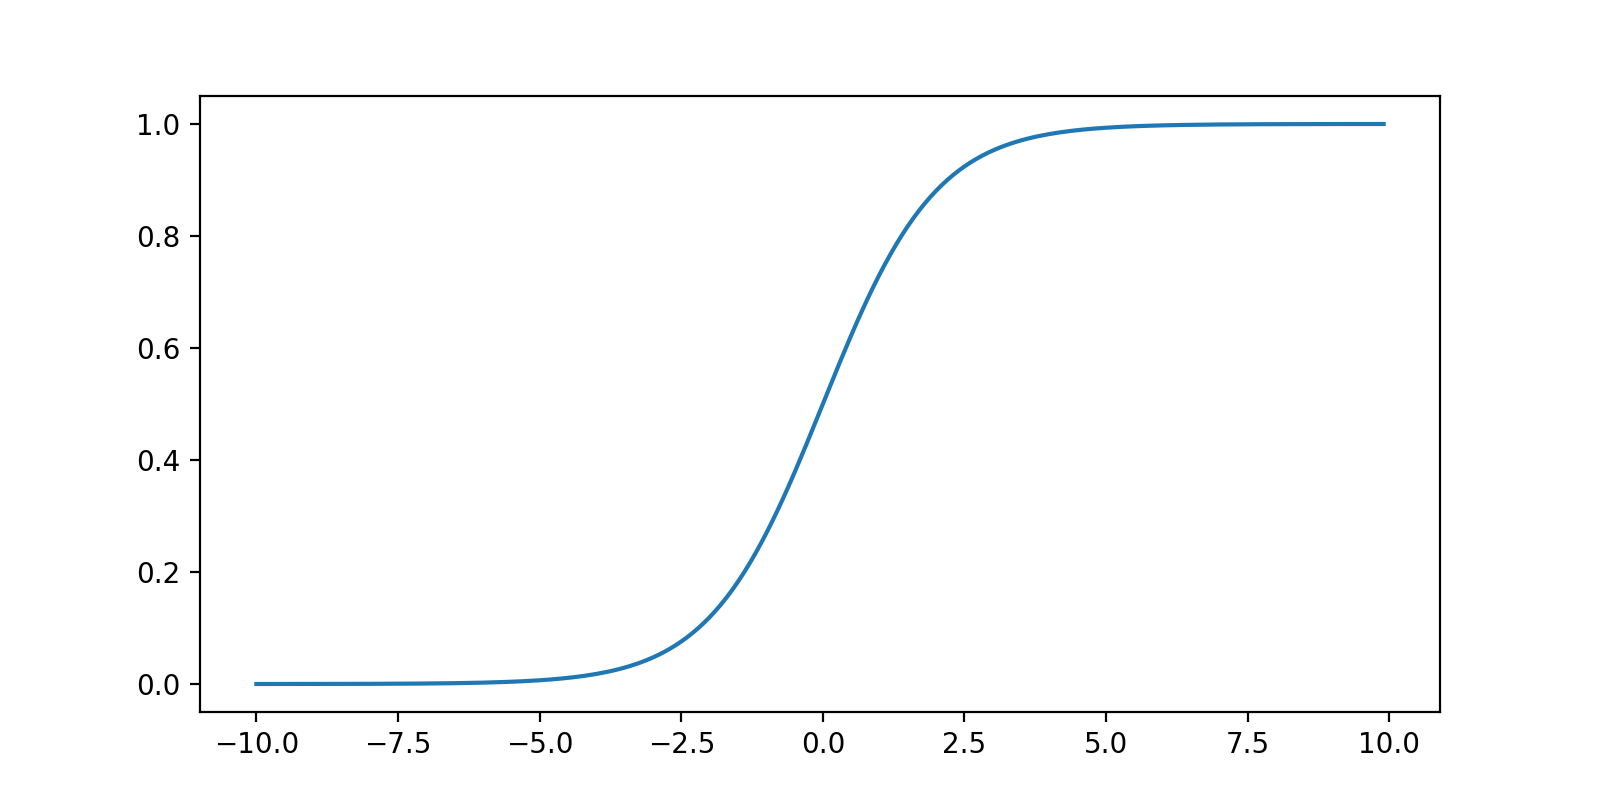

In [4]:
x=np.arange(-10,+10,step=0.1)
y=1/(1+np.exp(-x))
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.show()

## Interpretation of the perceptron
The perceptron acts as a binary classifier. Given a set of inputs together with a binary output $\{0,1\}$, the weights $w_i$ can be optimized so that the error is minimized. The trained classifier can then be used on new data. Since we use the logistic sigmoid function, this approach is well-known as _logistic regression_.

### Concept of a loss function
In classification or regression, we typically train a system to predict a result given a set of inputs. The difference between the predicted outcome and the measured one is classically called the _loss_. There are many possible _loss functions_ depending on the type of outcome.

### The quadratic loss
In linear regression, is it typical to consider a quadratic loss

$$
{\cal L}_2(\V{x},\V{y}) = \| \M{A}\V{x}-\V{y} \|^2,
$$ 

where the $\|.\|$ denotes the Euclidean (or $\ell_2$) norm and $A$ is a linear operator in matrix form. This loss gives rise to the well-known and powerful least-square methods. In linear regression this is well suited because the ${\cal L}_2$ loss is convex in this case.

This particular loss is very common because, in statistical terms, it corresponds to the log-likelihood of the Gaussian noise. Let us review these concepts in the next slide.



### Loss as a log-likelihood
Given a parametrized family of probability density functions (for a continuous distribution) or probability mass function (for a discrete distribution),
$$
\V{x} \mapsto f(\V{x}\, | \,\theta),
$$
where $\theta$ is the vector of parameters. We call the likelihood the function
$$
\theta \mapsto f(\V{x} \,|\, \theta).
$$
Typically, this function is written
$$
{\cal L}(\theta\, |\, \V{x}) = f(\V{x}\, |\, \theta)
$$

### The method of maximum likelihood estimation
Given the above, the method of maximum likelihood estimation (MLE) finds the value of the parameter vector $\hat{\theta}$ that maximizes the likelihood function ${\cal L}(\theta\, |\, x)$.
$$
\hat{\theta} = \underset{\theta}{\text{argmax}}\;{\cal L}(\theta\,|\,\V{x})
$$
As is typical, we go for a minimization instead of a maximization, and we take the log of the likelihood. The value of $\hat{\theta}$ is unchanged.
$$
\hat{\theta} = \underset{\theta}{\text{argmin}}\;-\log{\cal L}(\theta\,|\,\V{x})
$$
The function $-\log{\cal L}(\theta\,|\,\V{x})$ is often called the negative log-likelihood.

#### MLE estimation example
A typical case is when an observation represented by a linear operator $\M{H}$ is corrupted by noise. If we assume the noise is centered additive white Gaussian, we write

$$
\V{y} = \M{H}\V{x} + \eta,
$$
where $\eta \sim G(0,\sigma)$. We can write

$$
\M{H}\V{x} - \V{y} \sim G(0,\sigma),
$$
and so the probability distribution of $\V{x}$ given $\sigma$ is
$$
P(\V{x}|\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\|\M{H}\V{x}-\V{y}\|^2}{2\sigma^2}\right).
$$

Following the method of maximum likelihood, the best estimator for $\V{x}$ is (by taking the log and ignoring constants)

$$
\hat{\V{x}} = \underset{\V{x}}{\text{argmin}} \; \|\M{H}\V{x} - \V{y}\|^2,
$$

i.e. nothing more than the method of least squares, as mentioned above. since $\M{H}$ can be an arbitrary linear operator, it can represent very sophisticated aparatuses: MRI machines, CT scanners, non-trivial cameras, etc. This estimator is at the basis of many famous and varied methods in signal and image processing.

## Gradient descent
With the method of maximum likelihood estimation, we will need to compute
$$
\hat{\V{y}} = \underset{\V{w},b}{\text{argmin}}\;{\cal L}(\V{a},\V{y})
$$
For this, one way is to use the method of _gradient descent_. For this we take as example linear regression.

To solve the Least-Square regression problem, we seek a solution to 

$$
\V{x}^\star = \underset{\V{x}}{\operatorname{argmin}} f_0(\V{x)} = \| \M{A} \V{x} - \V{b}\|^2_2
$$

The gradient of this objective function is

$$
\nabla f_0 (\V{x}) = 2 \M{A}^\top (\M{A} \V{x} - \V{b})
$$

The gradient descent algorithm is basically
\begin{align}
\text{do} \{ & \\
             & \V{x}_{k+1} = \V{x}_{k} - \alpha \nabla f_0(\V{x}_k) \\
\} & \;\text{while}\;  (|\V{x}_k - \V{x}_{k+1}| > \varepsilon)
\end{align}


$\alpha$ is the stepsize, which is also called the _learning rate_. In the following function, it is fixed. Note that the maximum stepsize is a function of the maximum curvature of the function, or equivalently the maximum Lipschitz factor of the gradient of ${\cal L}$. 

In [8]:
def iterative_sol_gd(A, y, step, epsilon=1e-5, maxiter=10000):
    """
    This function solves a least-square problem by a gradient descent approach
    with a fixed stepsize.
    """
    AT = A.T
    pn = AT.dot(y) * 0.
    iter = 0
    while True:
        Grad = 2*A.T.dot(A.dot(pn) - y)
        pn1 = pn - step*Grad
        diff = pn1-pn
        if (diff.T.dot(diff) < epsilon*epsilon):
            print("OK (%d iterations)" % iter)
            break
        pn = pn1
        iter += 1
        if (iter > maxiter):
            print("Exceeded maximum number of iterations (%d)" % maxiter)
            break
    return pn1

In [9]:
def iterative_linear_regression(eps=1e-5, LF=1.5):
    """
        Iterative solution to the least square problem by gradient descent.
        LF is the Lipschitz factor. Theoretically 1.0 is the best and 2.0 diverges. 
        In practice slightly less than 2.0 yields (e.g. 1.99) better results.
    """
    # input range
    x = np.arange(1,4,0.01)
    n = x.size
    # linear model, corrupted by noise
    y1 = 3.0 * x + 2.0
    y = y1 + np.random.normal(0,0.5,n)
    # linear regression retrieves the model
    A= np.array((x, np.ones(n)))
    AT=A.T
    y= y.T
    # compute the Hessian of the system
    A2=AT.dot(A)
    # compute the largest eigenvalue
    leigh = eigh(A2,eigvals_only=True)
    mleigh = max(leigh)  
    print("Lipschitz constant = %f" % (2*mleigh))
    L= 1./(2*mleigh)
    ## print("Maximum stepsize = %f" % (2*L))
    res = iterative_sol_gd(AT,y,step=LF*L,epsilon=eps)
    print("Estimated parameters : p1=%.5f, p2=%.5f" % (res[0],res[1]))
    solutionA = np.dot(np.linalg.inv(np.dot(AT.T,AT)),np.dot(AT.T,y))
    print("Expected parameters  : p1=%.5f, p2=%.5f" % (solutionA[0],solutionA[1]))
    linesol1 = res[0]*x + res[1]
    linesol2 = solutionA[0]*x + solutionA[1]
    fig = plt.figure()
    plt.plot(x,y,"g.", x,linesol1,"--k", x,linesol2,"b")
    fig.show()
    return

Lipschitz constant = 4727.902862
OK (613 iterations)
Estimated parameters : p1=3.00420, p2=1.95101
Expected parameters  : p1=3.00419, p2=1.95101


<IPython.core.display.Javascript object>


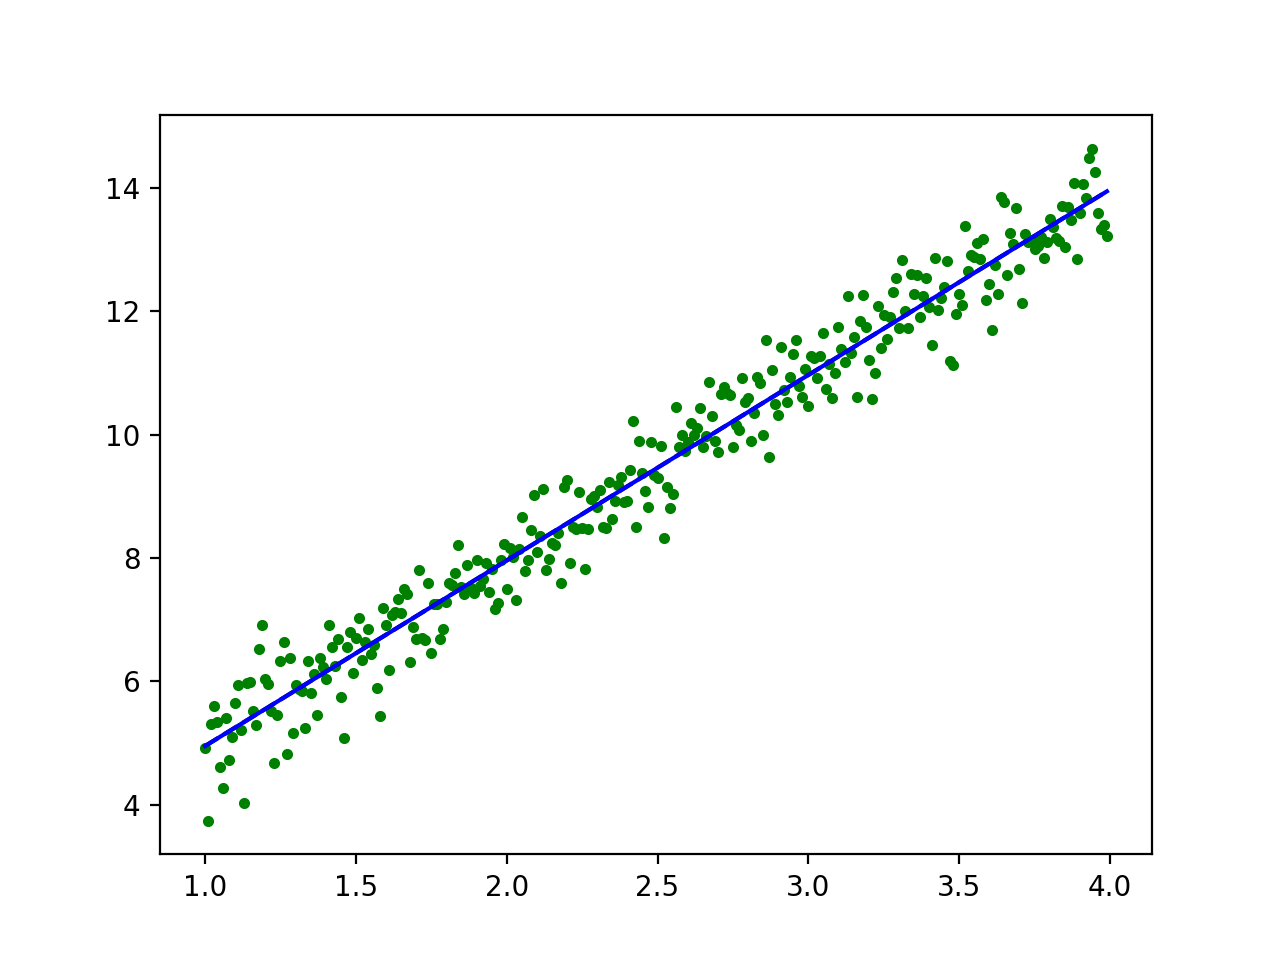

In [10]:
iterative_linear_regression(eps=1e-7,LF=1.6)

## Logistic loss
With the Perceptron, our output is real number between 0 and 1, which we compare to a binary ground truth, our system is no longer linear, so the quadratic loss is not suitable. Recall that in standard linear regression, we seek to make predictions of the sort
$$
\hat{\V{y}} = \V{w}^\top\V{y} + b
$$
With logistic regression, we seek a $\hat{\V{y}} \in \{0,1\}$ answer, so we coerce the previous model into a "smooth" thresholding function, the sigmoid:
$$
\hat{\V{y}} = \sigma(\V{w}^\top\V{y} + b).
$$

### Derivation of the logistic loss in the scalar case
The output will look like a probability $\hat{y} \in [0,1]$. We also have $\sigma(-z) = 1-\sigma(z)$. We may write
\begin{align}
P(y=1\,|\,z) &= \sigma(z) = \frac{1}{1+e^{-z}}\\
P(y=0\,|\,z) &= 1-\sigma(z) = \frac{1}{1+e^{z}}.
\end{align}
Since $y$ is either 0 or 1, these may be expressed more compactly together in a single equation as
$$
P(y,z) = \sigma(z)^y\,(1-\sigma(z))^{1-y}
$$
The negative log-likelihood is therefore
\begin{align}
{\cal L}(z,y) &= -\log(\sigma(z)^y\,(1-\sigma(z))^{1-y})\\
              &= -(y\log(\sigma(z)) + (1-y)\log(1-\sigma(z)))
\end{align}

This is also called the cross entropy loss

### Logistic loss in the vectorial case
The vectorial case is exactly the same, with 
\begin{align}
{\cal L}(\V{z},y) &= -\log(\sigma(\V{z})^y\,(1-\sigma(\V{z}))^{1-y})\\
              &= -(y\log(\sigma(\V{z})) + (1-y)\log(1-\sigma(\V{z}))),
\end{align}
recall that even in this case $y$ is a scalar.

If we write $a = \sigma(\V{w}^\top\V{y} + b)$, we can also write
\begin{equation}
{\cal L}(\V{a},y) = -(y\log \V{a} + (1-y)\log(1-\V{a}))\label{logitloss}
\end{equation}

## Gradient descent for the 1D logistic regression

In order to take things gradually, we first consider a simple, one-parameter logistic regression problem. We consider 1D derivations, so all quantities here like $a$ and $y$ are scalar.

in 1D, the model is 

$$
a = \sigma(z) = \sigma(w x + b)
$$

We recall the logistic loss:
$$
{\cal L}(a,y) = -(y\log(a) + (1-y)\log(1-a))
$$
Deriving with respect to $a$ yields
$$
\frac{\partial {\cal L}}{\partial a} = -\frac{y}{a} + \frac{1-y}{1-a}
$$

Recall also that 
$$
a = \sigma(z) = \frac{1}{1+\exp(-z)}
$$

for the derivation with respect to $z$, we have to use the chain rule

$$
\frac{\partial{\cal L}}{\partial z} = \frac{\partial{\cal L}}{\partial a}\frac{\partial a}{\partial z}
$$

We have 
$$
\frac{\partial a}{\partial z} = \frac{\partial \sigma(z)}{\partial z} = \frac{\exp(-z)}{(1+\exp(-z))^2} = a (1-a)
$$
Hence, with the chain rule
\begin{align}
\frac{\partial{\cal L}}{\partial z} &= \left(-\frac{y}{a} + \frac{1-y}{1-a}\right) a (1-a)\\
                                    &= -y (1-a) + a (1-y) \\
                                    &= a - y
\end{align}


From this derivative we can compute the differentials for the parameters of the regression $w$ and $b$:

$$
\frac{\partial {\cal L}}{\partial w} = \frac{\partial {\cal L}}{\partial z}\frac{\partial z}{\partial w} = (a-y)x
$$

$$
\frac{\partial {\cal L}}{\partial b} = \frac{\partial {\cal L}}{\partial z}\frac{\partial z}{\partial b} = (a-y)
$$

From these, the gradient descent is straightforward. The code is in the next slide.

In [ ]:
def sigma(z):
    return (1/(1+np.exp(-z)))

def iterative_sol_1d_logistic_gd(x, y, step, epsilon=1e-5, maxiter=10000):
    """
    This function solves the 1d logistic regression problem by a gradient descent approach
    with a fixed stepsize.
    x and y are given vectors with the same size. x is real and y is binary.
    """
    J = np.zeros(maxiter+1) ; dw = 0 ; db = 0
    w = np.zeros(maxiter+1) ; b = np.zeros(maxiter+1)
    i = 0
    while True:
        z = w[i]*x + b[i]
        a = sigma(z)
        ## compute the loss
        J[i] = ### TO BE COMPLETED 
        dz = ### TO BE COMPLETED 
        dw = ### TO BE COMPLETED 
        db = np.sum(dz) ## equivalent to np.ones(y.shape[0]).dot(dx)
        w[i+1] = w[i] - step*dw
        b[i+1] = b[i] - step*db
        if ((dw*dw+db*db) < epsilon*epsilon):
            print("OK, iteration=", i)
            break
        i += 1
        if (i >= maxiter):
            print("Exceeded maximum number of iterations (%d)" % maxiter)
            break
    return (w,b,J,i)

In [ ]:
myT=np.random.random(10)*6+1
myF=np.random.random(10)*7-2
Y = np.concatenate((np.ones(10),np.zeros(10)))
X = np.concatenate((myT,myF))
plt.figure()
plt.scatter(X,Y)
plt.show()

In [ ]:
(w,b,J,i) = iterative_sol_1d_logistic_gd(X,Y,step=0.02,epsilon=1e-5,maxiter=50000)
trueW = w[0:i] ; trueB = b[0:i] ; trueJ = J[0:i]
lastW = trueW[-1] ; lastB = trueB[-1] ; lastJ = trueJ[-1]
print(lastW,lastB)
plt.figure()
plt.title("Log10 of the loss convergence")
plt.plot(np.log10(trueJ-lastJ))
plt.show()

In [ ]:
print("parametres du modèles: W=%g, B=%g"%(lastW,lastB))

In [ ]:
x = np.arange(-5,16,step=0.1)
plt.figure()
plt.scatter(X,Y)
plt.plot(x,sigma(lastW*x+lastB), color='r')
plt.show()
print("Inflexion point = ", -lastB/lastW)

## Multi-dimensional logistic regression

We have to adapt the formulas to the case where $\V{w}=\{w_1,w_2,\ldots,w_n\}$ is vectorial. $b$ remains a scalar. The loss was defined with vector elements and remains the same $\eqref{eq:logitloss}$. The code adaptation is fairly straightforward.

In [ ]:
## Normal python implementation

def iterative_sol_nd_logistic_gd(X, y, step, warm_restart=None, b=0, 
                                 epsilon=1e-5, maxiter=10000, verbose=False):
    """
    This function solves the N-d logistic regression problem by a gradient descent approach
    with a fixed stepsize.
    X is a NxM matrix, where N is the dimension of the problem and M the number of samples. 
    y is a binary vector of length M.
    """
    assert len(X.shape) == 2
    N = X.shape[0] ## dimension of the problem
    J = np.zeros(maxiter+1)  

    ## now these are vectors of length N
    if warm_restart is None:
        w = np.zeros(N,dtype=DTYPE) 
        b = 0
    else:
        w = warm_restart
        b = b # in the arglist

    if (verbose):
        ## progress report as things can be very slow
        stepiter=int(maxiter/50) ## print 50 dots

    i = 0
    while True:
        z = w.T.dot(X) + b ## should be a row vector of lenth M
        a = sigma(z) ## same
        ## compute the loss
        J[i] = ### TO BE COMPLETED 
        dz = ### TO BE COMPLETED 
        dw = ## TO BE COMPLETED ## should be a vector of length N
        db = ## TO BE COMPLETED  ## equivalent to np.ones(y.shape[0]).dot(dx)
        w = w - step*dw
        b = b - step*db
        if ((dw.T.dot(dw)+db*db) < epsilon*epsilon):
            print("OK, iteration=", i)
            break
        i += 1
        if (verbose):
            if (i%stepiter == 0):
                print('.', end='')
        if (i >= maxiter):
            print("Exceeded maximum number of iterations (%d)" % maxiter)
            print("Gradient norm still=", np.sqrt(dw.T.dot(dw)+db*db))
            break
    return (w,b,J,i)

#### 2-d illustration
Here we create an artificial example with some Gaussian distributions. In this example, the blue dots are the negative samples and the red dots the positive ones. We apply Logistic Regression to form a decision model separating both populations.

In [ ]:
## create two populations
M=100
myT = np.random.randn(M,2)*2+(6,5)
myF = np.random.randn(M,2)*1.5+(3,3)
X=np.concatenate((myF,myT))
y = np.concatenate((np.zeros(M),np.ones(M)))
plt.figure()
plt.scatter(X[0:M,0],X[0:M,1],color="blue")
plt.scatter(X[M:,0],X[M:,1],color="red")
plt.show()

In [ ]:
(w,b,J,i) = iterative_sol_nd_logistic_gd(X.T,y,step=2.5e-3,epsilon=1e-7,maxiter=20000)
trueJ = J[0:i] ; lastJ = trueJ[-1]
print("w=",w, " b=", b)
plt.figure()
plt.title("Log10 of the loss convergence")
plt.plot(np.log10(trueJ-lastJ))
plt.show()

In [ ]:
X.shape

#### Best separation
The "best" separation between the two populations is the line where $a = \V{w}^\top\V{x} + b = 0$. This line defines a unique hyperplane. In 2D, the hyperplane is simply a line, this can be written as

\begin{align}
w_1 x_1 + w_2 x_2 + b & = 0\\
x_1 = 0 ; x_2 &= -\frac{b}{w_2} \\
x_2 = 0 ; x_1 &= -\frac{b}{w_1}
\end{align}

This line can be interpreted as the line of equi-probability since $\sigma(0) = 0.5$. Said otherwise, points on this line are as likely to belong to the blue or red class, given the training data.

In [ ]:
plt.figure()
plt.scatter(X[0:M,0],X[0:M,1],color="blue")
plt.scatter(X[M:,0],X[M:,1],color="red")
plt.plot([(-b/w[0]), 0], [0, (-b/w[1])], 'k-')

plt.show()

### Accuracy and test data
What we've just done is provide some (artificial) test data to fit a regresssion line between two distributions. In real problems these distributions are unknown, but here we know the limit distribution perfectly since we simulated it. First it might be intersesting to revisit some classification principles and methods based on this example.

The first thing to realize is that we classify as positives the dots associated with a $\sigma \geq 0.5$ and negative the remainder. By doing so, we make some mistakes since some blue dots are beyond the equiprobable line and some red dots are before it.

There are 4 classes of points: the red dots that are correctly classified 
    as positive (True Positives), the red dots that are incorrectly classified as negative (False Negatives), the blue dots that are incorrectly classified as positives (False Positives) and finally the blue dots that are correcty classified as negatives (True Negatives).

The arrangement of these 4 numbers in a matrix is called the confusion matrix:

|                             | True condition  | False Condition |
|-----------------------------|-----------------|-----------------|
|Predicted condition positive | True Positives  | False Positives |
|Predicted condition negative | False Negatives | True Negatives  |

One way to summarize the mistakes made is to compute a few ratios. 
The two more common to medicine are the sensitivity and specificity. More specifically

sensitivity (or true positive rate, TPR) = $\frac{\text{TP}}{\text{TP}+\text{FN}}$ ; specificity (or true negative rate TNR) = $\frac{\text{TN}}{\text{FP}+\text{TN}}$

General accuracy (which is only appropriate for a balanced example) is the average of these two ratios, or $\text{accuracy} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$. Generally, the higher the accuracy the better, but in some instances it might be better to lower the FN vs. the FP or vice-versa.

In [ ]:
def logit_test(x):
    return(sigma(w.dot(x.T)+b))

def classif_results(X, cut=0.5):
    """ Returns the confusion matrix of a balanced logistic regression
    """
    M = int(X.shape[0]/2) ## assuming as many negatives as positive, as is the case here
    res = logit_test(X)
    neg = res[0:M] ; pos = res[M:(2*M)]
    TP = pos[pos[0:M] >= cut].shape[0] ## red dots that should be red
    FN = M-TP
    TN = neg[neg[0:M] < cut].shape[0]
    FP = M-TN
    return((TP,FP,FN,TN))

TP,FP,FN,TN = classif_results(X)
print("Sensitivity = ", TP/(TP+FN), " Specificity = ", TN/(FP+TN))

With the default cutoff at 0.5, the ratios are about the same. We can see how these numbers change if we change the cutoff. To display this in a synthetic fashion, we can plot them in a sensitivity vs. specificity scatter plot, called the <a href=https://en.wikipedia.org/wiki/Receiver_operating_characteristic>Receiver Operating Characteristic</a> or ROC. Typically the abcissa are the FP (or 1-specificity) and the ordinates are the TP (or sensitivity).

In [ ]:
v=np.arange(10,-5,step=-0.2)
roc = np.zeros((v.shape[0],2))
bestacc = 0
besti = 0
for i in range(0,v.shape[0]):
    cut = sigma(v[i])
    TP,FP,FN,TN = classif_results(X,cut)
    roc[i,0]=1-(TN/(FP+TN))
    roc[i,1]=TP/(TP+FN)
    acc = (TP+TN)/(TP+TN+FN+FP)
    if (acc > bestacc):
        bestacc = acc
        besti = i
    
plt.figure(figsize=(8,6))
plt.plot(roc[:,0],roc[:,1])
plt.scatter(roc[:,0],roc[:,1],color='red')
plt.scatter(roc[besti,0],roc[besti,1],color='green')
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positives")
plt.ylabel("True positives")

print("Best accuracy (green dot) = ", bestacc, ", for FPR=%.3g"%roc[besti,0]," TPR=%.3g"%roc[besti,1], ", i.e. cutoff=%g"%sigma(v[besti]))

#### Remarks:
As can be seen, the best cutoff in terms of accuracy is not 0.5, but close to 0.3 in this example. This is because Logistic regression does not try to optimize accuracy. However, choosing a cutoff other than 0.5 generates a bias in the method, which is often undesirable. This is an early example of the unavoidable variance-bias tradeoff in all machine learning methods that will merit consideration in a later course.


## Applying logistic regression to a real problem

Here we apply our logistic regression approch to a real problem, the Wisconsin Breast Cancer dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Dataset keys=", cancer.keys())
print("Dataset features = ", cancer['feature_names'], "\n There are", len(cancer['feature_names']), "features")

In [ ]:
import pandas

data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
frame = pandas.DataFrame(data, columns=columns)

We show a few data points below. Overall there are 569 cases. The last column is the target, i.e. what the model should predict. 0 is benign and 1 is cancer.

In [ ]:
print("Number of cases = ", len(frame))
frame[1:10]

### Training and testing subsets
We split the data set into training and testing cases subsets. This is very common but not the only way to ensure that the classification works correctly.

In [ ]:
from sklearn.model_selection import train_test_split

X = frame[frame.columns[:-1]] # we remove the last column
y = frame.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
print("Number of training samples = ", len(y_train), ", number of test samples =", len(y_test))
X_train_matrix=X_train.values ## much faster if we do this
y_train_vector=y_train.values ## same

#### Running the algorithm

We now run the algorithm we wrote earlier. Unfortunately in this case, we perform gradient descent in a high-dimensional space and it can be very slow. In order to improve things somewhat we perform a "warm restart" of the algorithm, which allows us to increase the step size. This is still very slow. In subsequent work, we will see how to improve this aspect of the algorithm.

In [ ]:
import time

(w,b,J,i) = iterative_sol_nd_logistic_gd(X_train_matrix.T,y_train_vector,step=1e-6,epsilon=1e-5,maxiter=40000)
print("w0=",w, " b0=", b)
# WR1
tic=time.time()
(w,b,J,i) = iterative_sol_nd_logistic_gd(X_train_matrix.T,y_train_vector, 
                                          warm_restart=w,b=b,
                                          step=2e-6,epsilon=1e-5,maxiter=400000,verbose=True)
toc=time.time()
elapsed = toc - tic
print("Elapsed=",elapsed,"s")
trueJ = J[0:i] ; lastJ = trueJ[-1]
print("w=",w, " b=", b)
plt.figure()
plt.title("Log10 of the loss convergence")
plt.plot(np.log10(trueJ-lastJ))
plt.show()

In [ ]:
trueJ

### Classification results on the real data
Even though convergence is not achieved, we use the weight we have learn to perform classification and see how we go.

In [ ]:
def confusion(w,b,X,y):
    z = w.T.dot(X.T) + b
    prob = (sigma(z) >= 0.5).astype(int) ## prediction
    trueP = (y == 1)
    ptp = prob[trueP]
    TP=np.sum(ptp) ## works because the outcomes are binary
    FN=np.sum(1-ptp)
    trueN = (y == 0)
    ptn = prob[trueN]
    TN = np.sum(1-ptn)
    FP = np.sum(ptn)
    return((TP,FP,FN,TN))


print("Training set:")
print("Confusion matrix=")
TP,FP,FN,TN=confusion(w,b,X_train_matrix,y_train_vector)
print(np.array([[TP,FP],[FN,TN]]))
print("Sensitivity = %.3g"% (TP/(TP+FN)), " Specificity = %.3g"% (TN/(FP+TN)))

print("Test set: ")
X_test_matrix=X_test.as_matrix() ## much faster if we do this
y_test_vector=y_test.as_matrix() ## same
TP,FP,FN,TN=confusion(w,b,X_test_matrix,y_test_vector)
print(np.array([[TP,FP],[FN,TN]]))
print("Sensitivity = %.3g"% (TP/(TP+FN)), " Specificity = %.3g"% (TN/(FP+TN)))


Not bad ! 94.4% sensitivity on the test set means we detect 94.4% of breast cancers; while 98.1% specificity means only 1.9% of cases (100%-98.1%) are benign cases misclassified as cancers. We also notice that the results on the test set are not very different that those of the training set. This is a feature of linear classifiers like Logistic Regression: they are unbiased.

### Professional version of logistic regression
Scikit-learn provides an efficient version of logistic regression that converges quickly. Let's use that.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

# Load the cancer data
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train_pro, X_test_pro, y_train_pro, y_test_pro = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
# Call the Logisitic Regression function
clf = LogisticRegression()
clf.verbose=1
clf.fit(X_train_pro, y_train_pro)

In [ ]:
print(clf.coef_[0])
print(clf.intercept_)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute and print the Accuray scores
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train_pro, y_train_pro)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test_pro, y_test_pro)))

y_predicted_0 = clf.predict(X_train_pro)
confusion0 = confusion_matrix(y_train_pro, y_predicted_0)
print(confusion0)
print("The above is perhaps optimistic...")
print('Accuracy: {:.3f}'.format(accuracy_score(y_train_pro, y_predicted_0)))
print('Precision: {:.3f}'.format(precision_score(y_train_pro, y_predicted_0)))
print('Recall: {:.3f}'.format(recall_score(y_train_pro, y_predicted_0)))
print('F1: {:.3f}'.format(f1_score(y_train_pro, y_predicted_0)))
print("-----")
print("More realistic")
y_predicted=clf.predict(X_test_pro)
# Compute and print confusion matrix
confusion = confusion_matrix(y_test_pro, y_predicted)
print(confusion)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test_pro, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test_pro, y_predicted)))
print('Recall: {:.3f}'.format(recall_score(y_test_pro, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test_pro, y_predicted)))

The results are exactly the same !

## Using the k-NN method

We use the k-Nearest-Neighbours model instead of the logistic regression

In [ ]:
# was: from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load the cancer data
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train_pro, X_test_pro, y_train_pro, y_test_pro = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
# Call the Logisitic Regression function
klf = KNeighborsClassifier(n_neighbors=20)
klf.verbose=1
klf.fit(X_train_pro, y_train_pro)

In [ ]:
# Compute and print the Accuray scores
print('Accuracy of k-NN classifier on training set: {:.2f}'
     .format(klf.score(X_train_pro, y_train_pro)))
print('Accuracy of k-NN classifier on test set: {:.2f}'
     .format(klf.score(X_test_pro, y_test_pro)))

y_predicted_0 = klf.predict(X_train_pro)
confusion0 = confusion_matrix(y_train_pro, y_predicted_0)
print(confusion0)
print("The above is perhaps optimistic...")
print('Accuracy: {:.3f}'.format(accuracy_score(y_train_pro, y_predicted_0)))
print('Precision: {:.3f}'.format(precision_score(y_train_pro, y_predicted_0)))
print('Recall: {:.3f}'.format(recall_score(y_train_pro, y_predicted_0)))
print('F1: {:.3f}'.format(f1_score(y_train_pro, y_predicted_0)))
print("-----")
print("More realistic")
y_predicted=klf.predict(X_test_pro)
# Compute and print confusion matrix
confusion = confusion_matrix(y_test_pro, y_predicted)
print(confusion)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_test_pro, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test_pro, y_predicted)))
print('Recall: {:.3f}'.format(recall_score(y_test_pro, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test_pro, y_predicted)))

## Using decision trees

In [ ]:
# was: from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Load the cancer data
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train_pro, X_test_pro, y_train_pro, y_test_pro = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
# Call the Logisitic Regression function
tlf = DecisionTreeClassifier(min_samples_split=10, max_depth=2)
tlf.verbose=1
tlf.fit(X_train_pro, y_train_pro)

In [ ]:
# Compute and print the Accuray scores
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(tlf.score(X_train_pro, y_train_pro)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(tlf.score(X_test_pro, y_test_pro)))

y_predicted_0 = tlf.predict(X_train_pro)
confusion0 = confusion_matrix(y_train_pro, y_predicted_0)
print(confusion0)
print("The above is perhaps optimistic...")
print('Accuracy: {:.3f}'.format(accuracy_score(y_train_pro, y_predicted_0)))
print('Precision: {:.3f}'.format(precision_score(y_train_pro, y_predicted_0)))
print('Recall: {:.3f}'.format(recall_score(y_train_pro, y_predicted_0)))
print('F1: {:.3f}'.format(f1_score(y_train_pro, y_predicted_0)))
print("-----")
print("More realistic")
y_predicted=tlf.predict(X_test_pro)
# Compute and print confusion matrix
confusion = confusion_matrix(y_test_pro, y_predicted)
print(confusion)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_test_pro, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test_pro, y_predicted)))
print('Recall: {:.3f}'.format(recall_score(y_test_pro, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test_pro, y_predicted)))

## Display tree


In [ ]:
from sklearn import tree
from os import system


dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(tlf, out_file = dotfile, feature_names = X.columns)
dotfile.close()
system("dot -Tpng dtree2.dot -o dtree2.png")

## Conclusion
In this series of slides we have introduced the Perceptron, which is the simplest instance of a neural network: a simulation of a single neuron. We have seen that it is exactly equivalent to Logistic Regression, a classical machine learning technique.
We have also shown how to train the perceptron via gradient descent. We have shown that this technique is not very  complicated but not very efficient. 
We have shown that in spite of its simplicity, it is possible to achieve very good results with it. Future work will involve cascades of neurons arranged in artificial neural networks (ANN), but will use much of the same techniques.